In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

In [2]:
# List of all columns
print(df.columns)  

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
 # First 5 rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing data

continent                                   19015
total_cases                                 38963
new_cases                                   11100
new_cases_smoothed                          12330
total_deaths                                61439
                                            ...  
human_development_index                     97991
excess_mortality_cumulative_absolute       384295
excess_mortality_cumulative                384295
excess_mortality                           384295
excess_mortality_cumulative_per_million    384295
Length: 63, dtype: int64


In [5]:
# Define countries of interest
countries = ['Kenya', 'United States', 'India']

In [6]:
# Filter the dataset
df_filtered = df[df['location'].isin(countries)]

In [7]:
# Drop rows where 'date' or 'total_cases' is missing
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

In [8]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

In [9]:
# Handle missing numeric values with fillna()
df_filtered = df_filtered.fillna(method='ffill').fillna(method='bfill')

In [10]:
# Interpolate missing values
df_filtered = df_filtered.interpolate()

In [11]:
#  Apply these only to numeric columns
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate()


In [12]:
# Plot Total Cases Over Time (Line Chart) for Kenya, USA, India
import matplotlib.pyplot as plt
import seaborn as sns

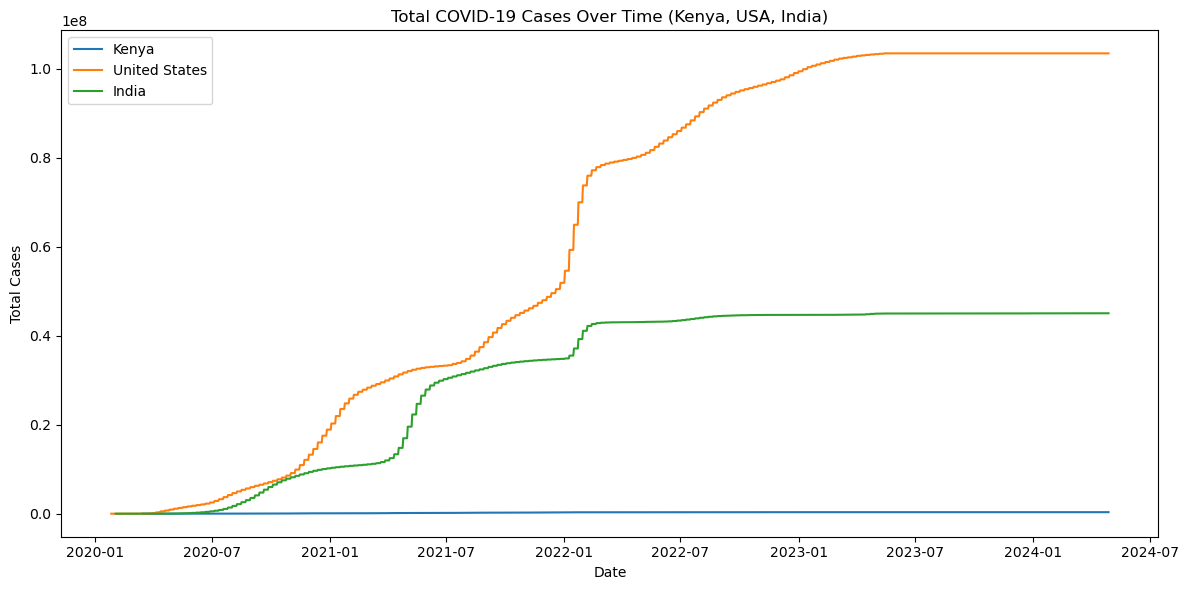

In [13]:
# List of selected countries
selected_countries = ['Kenya', 'United States', 'India']

# Plot total cases for selected countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time (Kenya, USA, India)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Plot Total Deaths Over Time

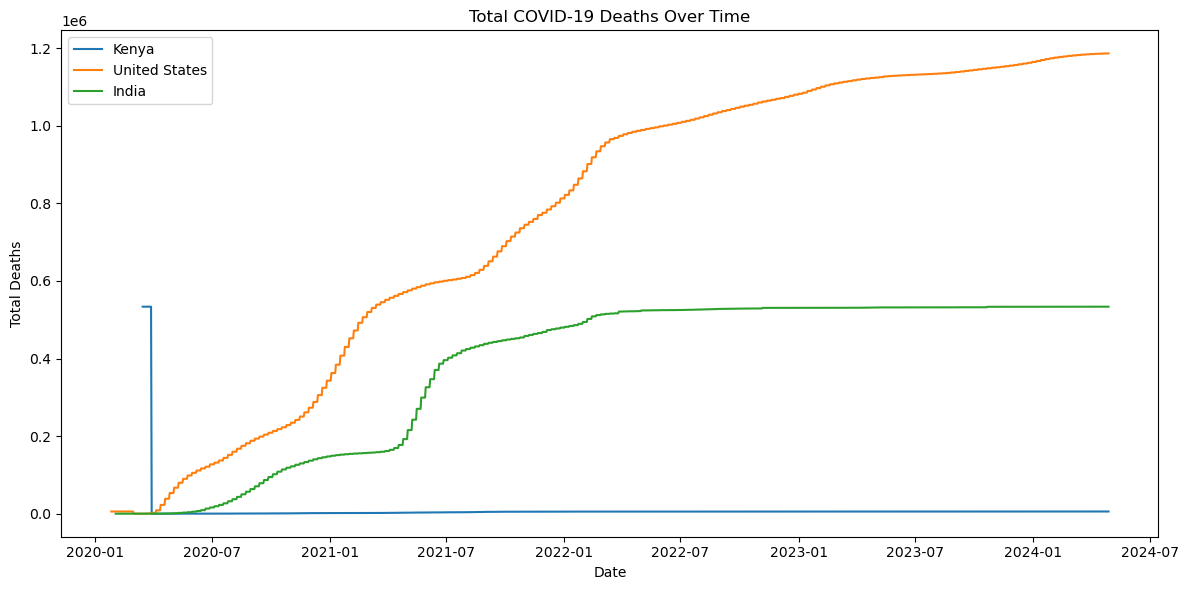

In [15]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Compare Daily New Cases Between Countries

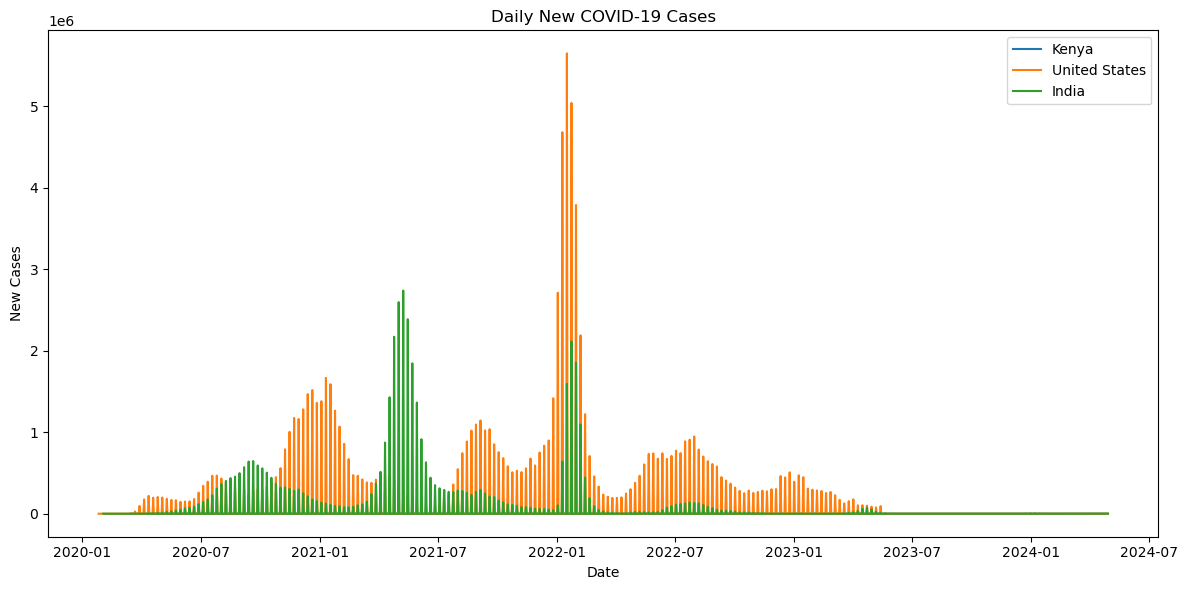

In [17]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Calculate and Plot Death Rate

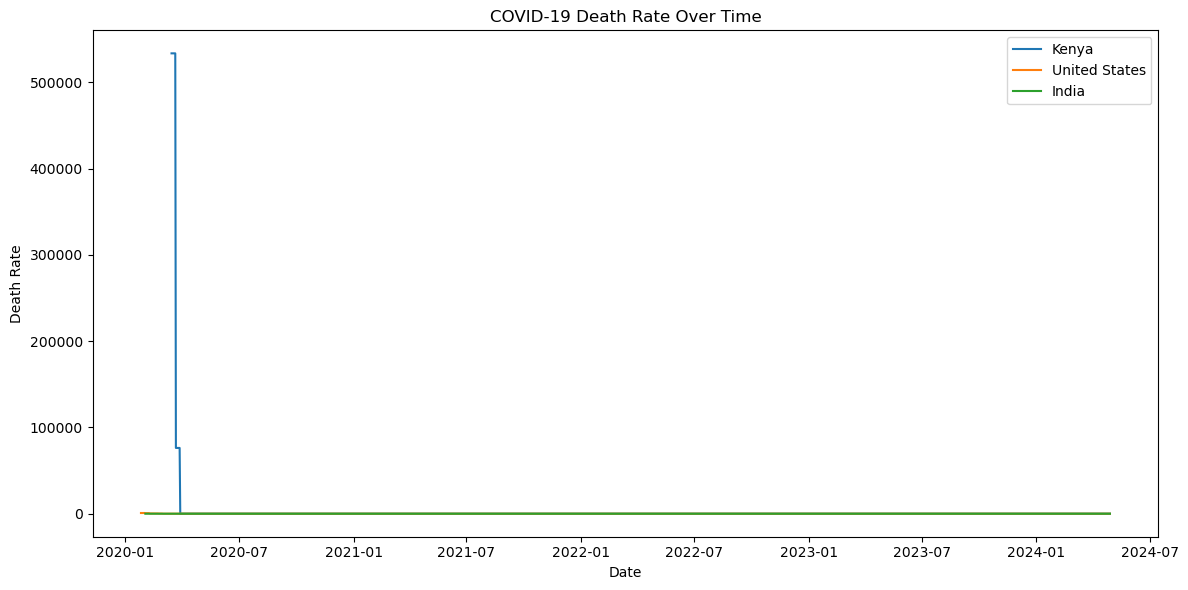

In [19]:
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


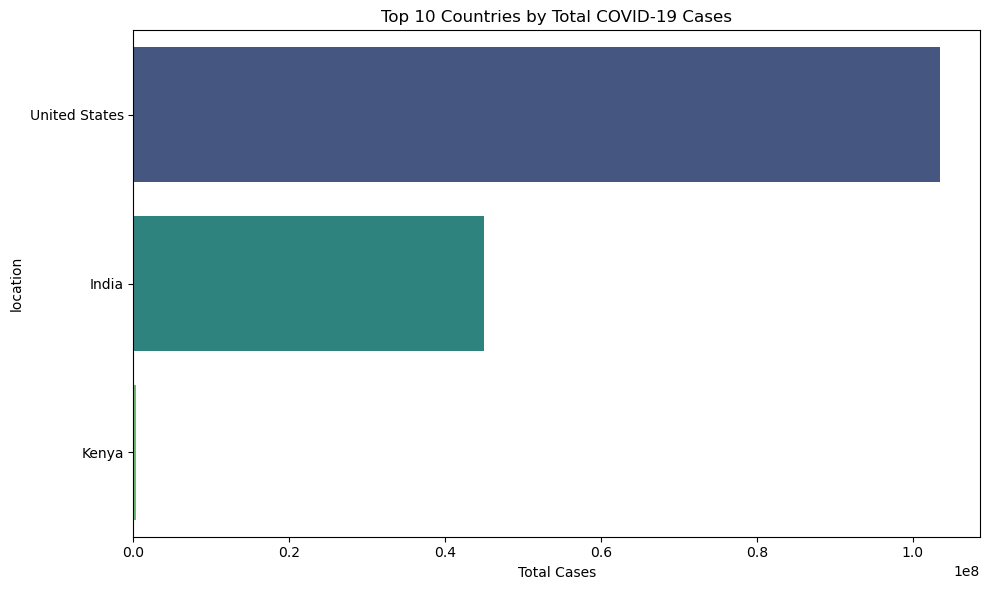

In [20]:
# Bar Chart – Top Countries by Total Cases
# Get latest date in dataset
latest_date = df_filtered['date'].max()

# Get total cases per country on latest date
latest_data = df_filtered[df_filtered['date'] == latest_date]
top_cases = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cases.values, y=top_cases.index, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.tight_layout()
plt.show()


In [21]:
# Correlation Heatmap (for numeric trends)

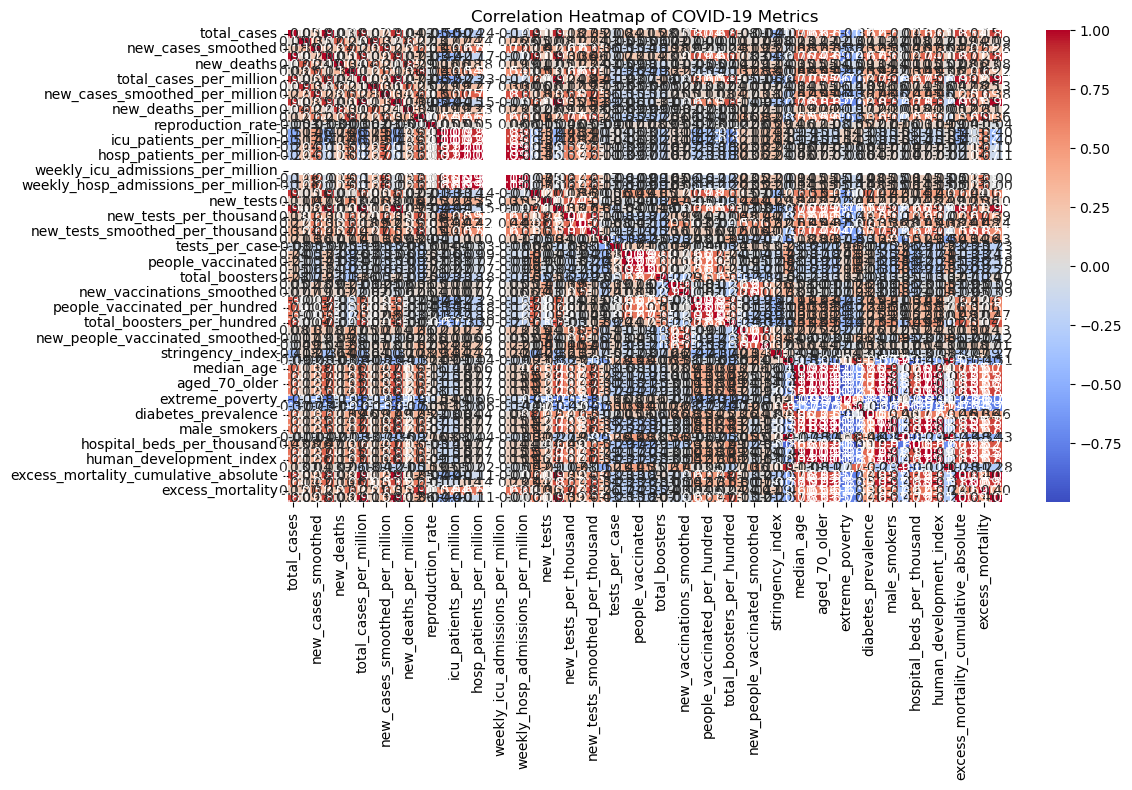

In [22]:
# Compute correlation matrix
corr = df_filtered[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()


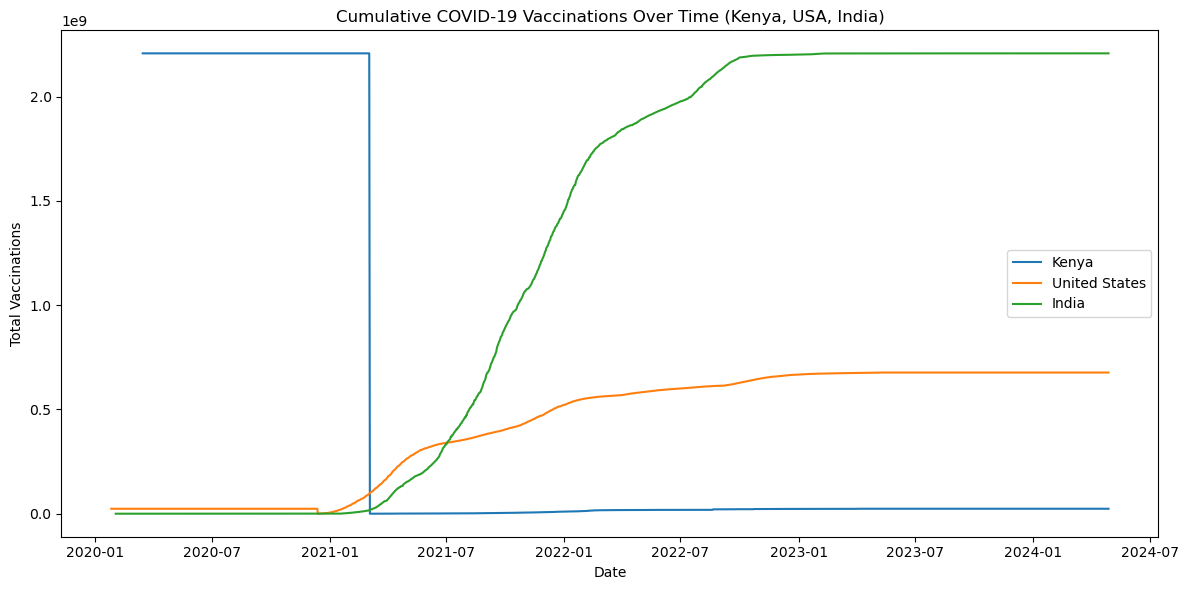

In [23]:
# Plot cumulative vaccinations for selected countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time (Kenya, USA, India)')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

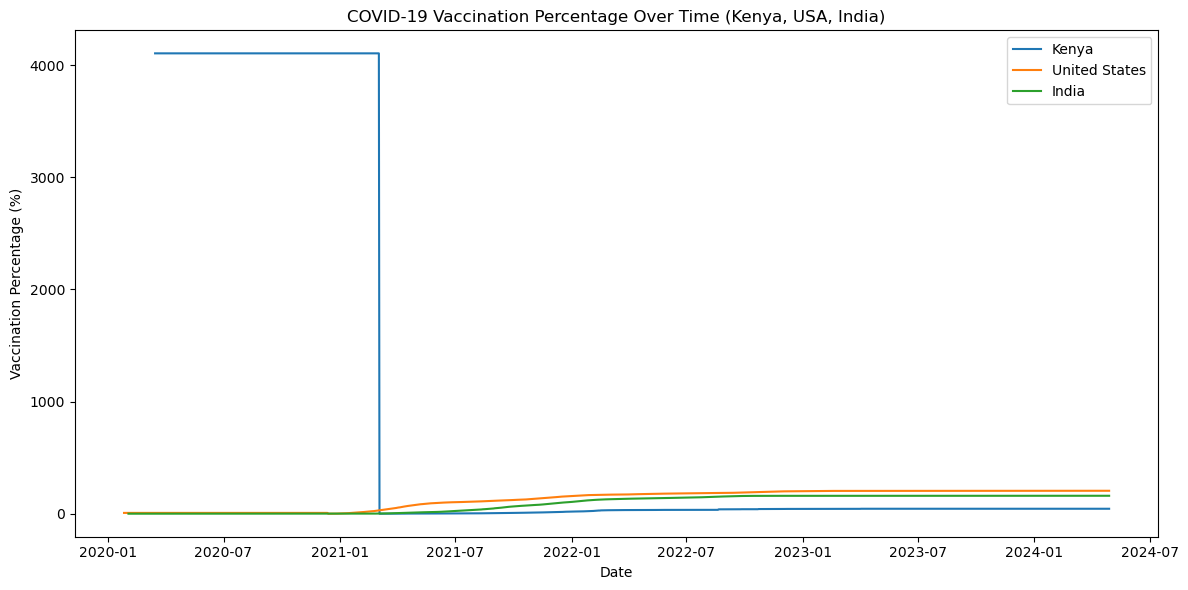

In [24]:
# Example population data (adjust as needed for accuracy)
population_data = {
    'Kenya': 53771296,  # Example population, replace with the latest figures
    'United States': 331002651,
    'India': 1380004385
}

# Add vaccination percentage column
df_filtered['vaccination_percentage'] = df_filtered.apply(
    lambda row: (row['total_vaccinations'] / population_data[row['location']]) * 100 if row['location'] in population_data else None, axis=1
)

# Plot vaccination percentage over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['vaccination_percentage'], label=country)

plt.title('COVID-19 Vaccination Percentage Over Time (Kenya, USA, India)')
plt.xlabel('Date')
plt.ylabel('Vaccination Percentage (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
import plotly.express as px

# Get the latest date in the dataset
latest_date = df_filtered['date'].max()

# Filter the data for the latest date
latest_data = df_filtered[df_filtered['date'] == latest_date]

# Prepare the dataframe with iso_code and total_cases for the choropleth
choropleth_data = latest_data[['iso_code', 'total_cases']]

# You can also add 'total_vaccinations' if you want to visualize vaccination rates
# choropleth_data = latest_data[['iso_code', 'total_vaccinations']]

# Fill missing ISO codes with a placeholder or drop them (optional)
choropleth_data = choropleth_data.dropna(subset=['iso_code'])

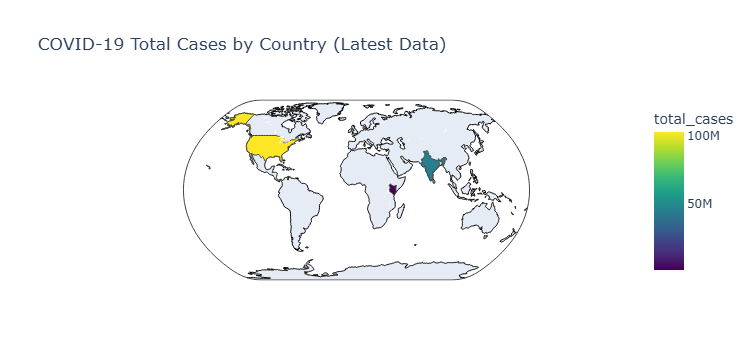

In [27]:
# Plot the choropleth map for total cases
fig = px.choropleth(choropleth_data,
                    locations="iso_code",  # Column with country codes
                    color="total_cases",   # Column to color by (total_cases or vaccination data)
                    hover_name="iso_code", # Hover label to show country name
                    color_continuous_scale="Viridis",  # Color scale
                    title="COVID-19 Total Cases by Country (Latest Data)")

fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig.show()


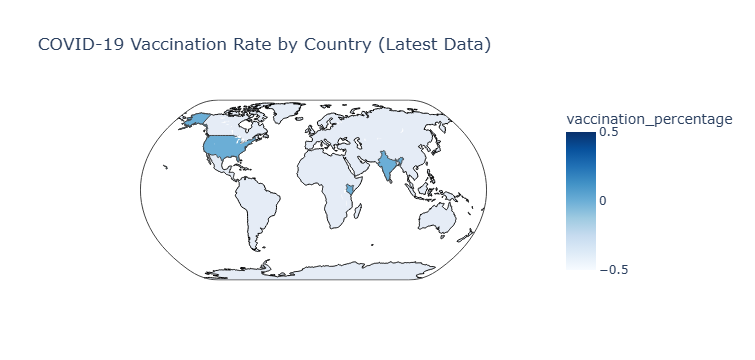

In [29]:
# Calculate vaccination percentage for each country
choropleth_data['vaccination_percentage'] = choropleth_data.apply(
    lambda row: (row['total_vaccinations'] / population_data.get(row['iso_code'], 1)) * 100 if 'total_vaccinations' in row else 0, axis=1)

# Plot the choropleth map for vaccination percentage
fig = px.choropleth(choropleth_data,
                    locations="iso_code",  # Country ISO code
                    color="vaccination_percentage",  # Vaccination rate
                    hover_name="iso_code",  # Country name
                    color_continuous_scale="Blues",  # Color scale for percentage
                    title="COVID-19 Vaccination Rate by Country (Latest Data)")

fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig.show()
